<a href="https://colab.research.google.com/github/Jmoralesmo27/g8/blob/main/CL3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Pregunta 1 a)**

In [2]:
import pandas as pd

In [3]:
# Cargar datos
path1 = "https://raw.githubusercontent.com/acosta187/datos/main/TitanicII.csv"
data = pd.read_csv(path1)

In [4]:
print(data.head())

   Survived  Pclass     Sex  Age     Fare
0         0       3    male   22   7.2500
1         1       1  female   38  71.2833
2         1       3  female   26   7.9250
3         1       1  female   35  53.1000
4         0       3    male   35   8.0500


In [5]:
import plotly.express as px

In [7]:
# Boxplot para la variable edad y survival
fig_edad = px.box(data, x='Survived', y='Age', title='Distribución de Edad por Supervivencia')
fig_edad.show()

In [8]:
# Boxplot para la variable fare y survival
fig_fare = px.box(data, x='Survived', y='Fare', title='Distribución del Costo del Pasaje por Supervivencia')
fig_fare.show()

In [9]:
from scipy.stats import ttest_ind

In [11]:
group_survived = data[data['Survived'] == 1]
group_not_survived = data[data['Survived'] == 0]

In [12]:
# Test de t-Student para la edad
t_stat_age, p_val_age = ttest_ind(group_survived['Age'].dropna(), group_not_survived['Age'].dropna())
print(f"Test de t-Student para la Edad: t={t_stat_age:.2f}, p={p_val_age:.3f}")

Test de t-Student para la Edad: t=-3.10, p=0.002


**Interpretación:** El valor de t es -3.10, lo cual indica una diferencia estadísticamente significativa entre las medias de edad de los que sobrevivieron y los que no. Un valor t negativo sugiere que la media de edad de los que no sobrevivieron es mayor que la de los que sí sobrevivieron.

El valor p es 0.002, que es menor que el umbral típico de 0.05, indicando que la diferencia observada es significativa y no es probable que se deba al azar. Podemos indicar que la edad influye en la probabilidad de supervivencia en el Titanic, siendo más joven un factor que parece favorecer la supervivencia.

In [13]:
# Test de t-Student para el fare
t_stat_fare, p_val_fare = ttest_ind(group_survived['Fare'].dropna(), group_not_survived['Fare'].dropna())
print(f"Test de t-Student para el Fare: t={t_stat_fare:.2f}, p={p_val_fare:.3f}")

Test de t-Student para el Fare: t=7.94, p=0.000


**Interpretación:** El valor de t es 7.94, indicando una diferencia estadísticamente significativa entre las medias de las tarifas pagadas por los pasajeros que sobrevivieron y los que no. Un valor t positivo tan alto sugiere que los pasajeros que sobrevivieron tendieron a pagar más por sus boletos en comparación con los que no sobrevivieron.

El valor p extremadamente bajo (0.000) fortalece esta conclusión, mostrando que la diferencia en las tarifas no es una coincidencia y es muy alta. Esto sugiere que la tarifa pagada podría ser un buen predictor de la supervivencia, donde pagar más podría estar asociado con una mayor probabilidad de sobrevivir, posiblemente debido a mejores condiciones de viaje o ubicación más segura dentro del barco.

**Pregunta 1 b)**

In [14]:
# Barplot para pclass y survival
fig_pclass = px.bar(data.groupby(['Pclass', 'Survived']).size().reset_index(name='count'),
                    x='Pclass', y='count', color='Survived', title='Supervivencia por Clase del Ticket')
fig_pclass.show()

# Barplot para sex y survival
fig_sex = px.bar(data.groupby(['Sex', 'Survived']).size().reset_index(name='count'),
                 x='Sex', y='count', color='Survived', title='Supervivencia por Género')
fig_sex.show()

In [15]:
from scipy.stats import chi2_contingency

In [16]:
# Tabla de contingencia para pclass
contingency_pclass = pd.crosstab(data['Pclass'], data['Survived'])
chi2, p, dof, expected = chi2_contingency(contingency_pclass)
print(f"Chi-cuadrado para pclass: chi2={chi2:.2f}, p={p:.3f}")

Chi-cuadrado para pclass: chi2=102.89, p=0.000


**Interpretación:** El valor chi-cuadrado obtenido para la clase del ticket fue de 102.89, con un valor p casi nulo (0.000). Esto significa que hay una asociación estadísticamente significativa entre la clase del ticket y la supervivencia de los pasajeros. En otras palabras, la clase en la que viajaban los pasajeros influyó considerablemente en sus probabilidades de sobrevivir. Este resultado no es realmente sorprendente, ya que históricamente sabemos que los pasajeros de primera clase tenían más probabilidades de acceder a los botes salvavidas y recibir ayuda durante el desastre.

In [18]:
# Tabla de contingencia para sex
contingency_sex = pd.crosstab(data['Sex'], data['Survived'])
chi2, p, dof, expected = chi2_contingency(contingency_sex)
print(f"Chi-cuadrado para sex: chi2={chi2:.2f}, p={p:.3f}")

Chi-cuadrado para sex: chi2=260.72, p=0.000


**Interpretación:** Para el género, el chi-cuadrado fue incluso más alto, 260.72, con un valor p igualmente insignificante (0.000). Esto indica una diferencia muy marcada en la supervivencia entre hombres y mujeres, siendo las mujeres significativamente más propensas a sobrevivir. Este resultado refleja la política de "las mujeres y los niños primero" que se aplicó durante la evacuación del Titanic.

**Pregunta 2)**

In [19]:
!pip install yfinance

In [20]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict

In [21]:
ticker = 'AAPL'
data = yf.download(ticker, start='2024-05-01', end='2024-05-10')

[*********************100%%**********************]  1 of 1 completed


In [22]:
print(data.head())

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-05-01  169.580002  172.710007  169.110001  169.300003  169.300003   
2024-05-02  172.509995  173.419998  170.889999  173.029999  173.029999   
2024-05-03  186.649994  187.000000  182.660004  183.380005  183.380005   
2024-05-06  182.350006  184.199997  180.419998  181.710007  181.710007   
2024-05-07  183.449997  184.899994  181.320007  182.399994  182.399994   

               Volume  
Date                   
2024-05-01   50383100  
2024-05-02   94214900  
2024-05-03  163224100  
2024-05-06   78569700  
2024-05-07   77305800  


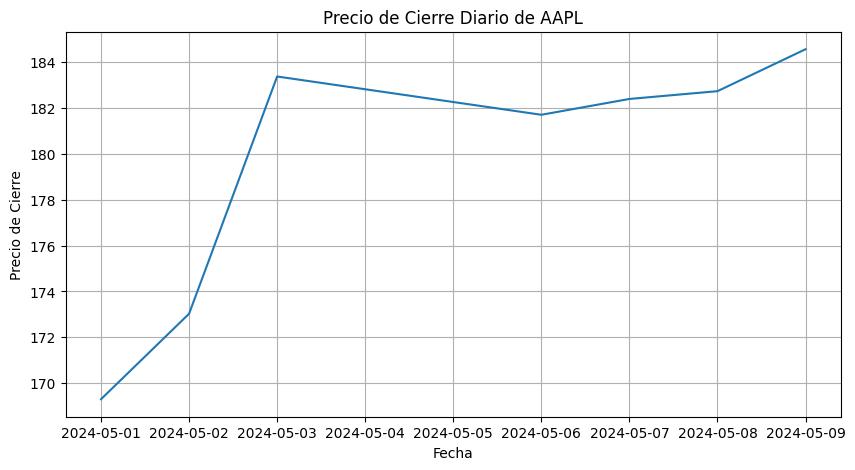

In [23]:
# Graficar el precio de cierre
plt.figure(figsize=(10, 5))
plt.plot(data['Close'])
plt.title(f'Precio de Cierre Diario de {ticker}')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')
plt.grid(True)
plt.show()

In [24]:
# Ajustar el modelo ARIMA
model = ARIMA(data['Close'], order=(1, 1, 1))
fitted_model = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [25]:
# Hacer predicciones
preds = fitted_model.get_forecast(steps=30)  # Predicción para los próximos 30 días
pred_ci = preds.conf_int()

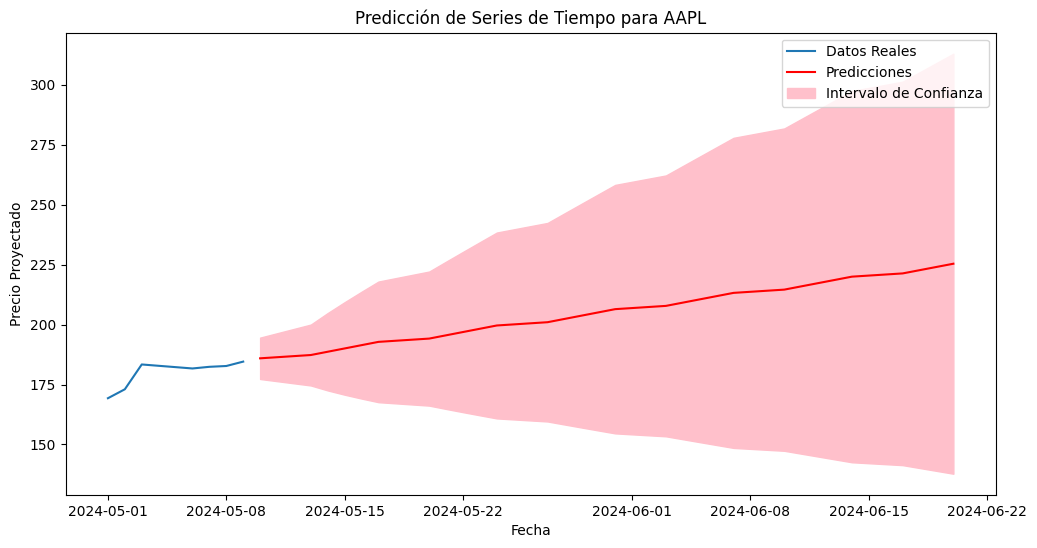

In [26]:
# Mostrar las predicciones
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Datos Reales')
plt.plot(preds.predicted_mean.index, preds.predicted_mean, color='red', label='Predicciones')
plt.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='pink', label='Intervalo de Confianza')
plt.title(f'Predicción de Series de Tiempo para {ticker}')
plt.xlabel('Fecha')
plt.ylabel('Precio Proyectado')
plt.legend()
plt.show()